In [1]:
import pandas as pd 
from matplotlib import pyplot as plt 
%matplotlib inline

pd.options.display.precision = 2

In [2]:
data = pd.read_csv("original.csv",index_col=0)

In [3]:
data.head()

,A,B,C
S001,156,151,100
S002,166,145,89
S003,175,176,108
S004,235,193,110
S005,136,172,106


In [4]:
data.describe()

,A,B,C
count,204.00,204.00,204.00
mean,134.41,152.33,102.79
std,33.69,31.23,17.30
min,60.00,68.00,0.00
25%,111.00,132.00,96.75
50%,132.00,151.00,107.00
75%,152.25,173.00,113.50
max,250.00,250.00,131.00


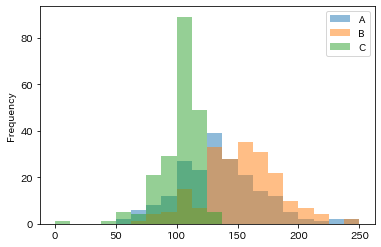

In [6]:
data.plot(kind="hist",alpha=0.5,bins=20)

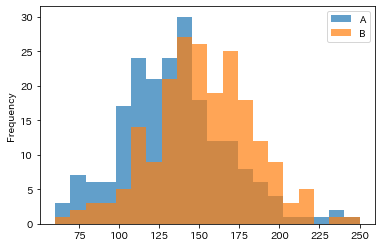

In [7]:
data.plot(y=["A","B"],kind="hist",alpha=0.7,bins=20)

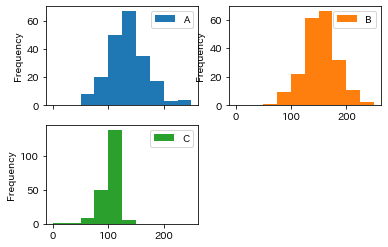

In [11]:
data.plot(subplots=True,layout=(2,2),kind="hist")
plt.savefig("test.png")

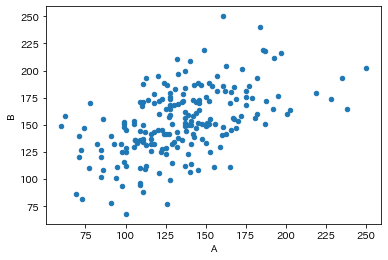

In [12]:
data.plot(kind="scatter",x="A",y="B")

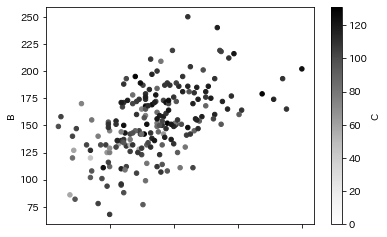

In [13]:
#散布図で3変数を表現する
data.plot(kind="scatter",x="A",y="B",c="C")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb92cd2af50>,
      dtype=object)

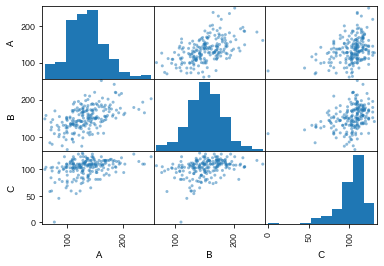

In [15]:
#散布図行列
from pandas.plotting import scatter_matrix
scatter_matrix(data,alpha=0.5)

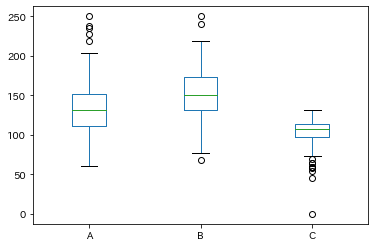

In [16]:
#箱ひげ図
data.plot.box()

In [18]:
data2 = pd.read_csv("original (1).csv",index_col=0)

In [19]:
data2.head()

,item1,item2,item3,item4,item5,item6,item7,item8,Class
s01,5,4,4,5,4,4,6,5,A
s02,4,3,1,3,3,3,2,4,A
s03,4,4,3,3,3,3,3,3,A
s04,5,3,3,3,3,4,3,3,A
s05,3,2,3,3,3,3,3,3,A


In [22]:
data2.groupby("Class").mean()

,item1,item2,item3,item4,item5,item6,item7,item8
Class,,,,,,,,
A,3.7,3.1,2.8,2.9,2.7,3.0,2.9,3.0
B,4.6,4.2,4.2,4.2,4.1,4.1,4.3,4.1


A         AxesSubplot(0.1,0.15;0.363636x0.75)
B    AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

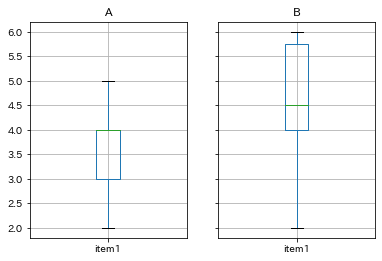

In [23]:
data2.groupby("Class").boxplot(column="item1")

In [25]:
s_total = data2.sum(axis=1)
s_total

s01    37
s02    23
s03    26
s04    27
s05    23
s06    14
s07    30
s08    19
s09    13
s10    29
s11    20
s12    48
s13    30
s14    39
s15    48
s16    35
s17    28
s18    18
s19    24
s20    48
dtype: int64

In [27]:
#受験者を上位群、中位群、下位群に分ける

G=[]

upper = s_total.quantile(.75)
lower = s_total.quantile(.25)

for i in s_total:
    if i>upper:
        G.append(3)
    elif i<lower:
        G.append(1)
    else:
        G.append(2)

G

[3, 2, 2, 2, 2, 1, 2, 1, 1, 2, 1, 3, 2, 3, 3, 2, 2, 1, 2, 3]

In [29]:
data2["G_P"] = G

In [30]:
data2.head()

,item1,item2,item3,item4,item5,item6,item7,item8,Class,G_P
s01,5,4,4,5,4,4,6,5,A,3
s02,4,3,1,3,3,3,2,4,A,2
s03,4,4,3,3,3,3,3,3,A,2
s04,5,3,3,3,3,4,3,3,A,2
s05,3,2,3,3,3,3,3,3,A,2


In [31]:
data2.groupby("G_P").mean()

,item1,item2,item3,item4,item5,item6,item7,item8
G_P,,,,,,,,
1,2.8,2.2,1.8,1.8,1.4,1.8,2.4,2.6
2,4.1,3.5,3.4,3.4,3.4,3.5,3.1,3.1
3,5.6,5.4,5.4,5.6,5.4,5.4,5.8,5.4


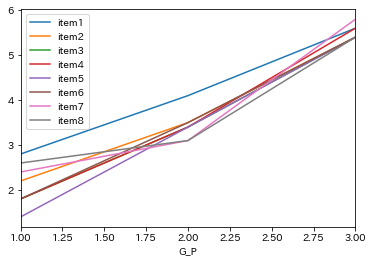

In [32]:
data2.groupby("G_P").mean().plot(kind="line")

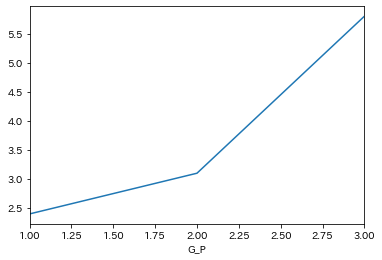

In [33]:
data2.groupby("G_P")["item7"].mean().plot(kind="line")

In [47]:
data3 = pd.read_csv("original (2).csv",index_col=0)

In [48]:
data3.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q51,Q52,Q53,Q54,Q55,Q56,Q57,Q58,Q59,Q60
S001,1,1,1,1,1,1,1,1,1,1,...,0,1,0,0,1,1,1,0,1,1
S002,1,1,1,0,1,1,1,1,1,1,...,0,1,1,0,1,0,0,0,0,0
S003,0,1,1,1,1,1,0,1,1,1,...,1,1,0,0,1,1,1,0,0,0
S004,1,1,1,1,0,1,1,1,1,1,...,1,1,0,1,1,1,1,0,1,1
S005,1,0,1,1,1,1,1,1,1,1,...,0,1,0,1,0,0,0,0,0,0


In [49]:
s_total2 = data3.sum(axis=1)
s_total2

S001    44
S002    32
S003    37
S004    44
S005    40
        ..
S088    42
S089    44
S090    46
S091    29
S092    38
Length: 92, dtype: int64

In [50]:
G2 = []

upper2 = s_total2.quantile(.75)
lower2 = s_total2.quantile(.25)

for i in s_total2:
    if i > upper2:
        G2.append(3)
    elif i < lower2:
        G2.append(1)
    else:
        G2.append(2)

G2

[2,
 1,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 3,
 1,
 2,
 1,
 2,
 3,
 2,
 1,
 2,
 2,
 3,
 2,
 1,
 1,
 2,
 1,
 2,
 1,
 3,
 3,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 2,
 1,
 1,
 2,
 3,
 2,
 2,
 3,
 1,
 3,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 1,
 2,
 2,
 3,
 2,
 1,
 2,
 2,
 3,
 2,
 3,
 3,
 2,
 2,
 3,
 2,
 2,
 2,
 3,
 3,
 2,
 2,
 3,
 1,
 2]

In [57]:
data3["G_P"] = G2

In [58]:
data3.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q53,Q54,Q55,Q56,Q57,Q58,Q59,Q60,rate,G_P
S001,1,1,1,1,1,1,1,1,1,1,...,0,0,1,1,1,0,1,1,47.83,2
S002,1,1,1,0,1,1,1,1,1,1,...,1,0,1,0,0,0,0,0,34.78,1
S003,0,1,1,1,1,1,0,1,1,1,...,0,0,1,1,1,0,0,0,40.22,2
S004,1,1,1,1,0,1,1,1,1,1,...,0,1,1,1,1,0,1,1,47.83,2
S005,1,0,1,1,1,1,1,1,1,1,...,0,1,0,0,0,0,0,0,43.48,2


In [59]:
s_total2

S001    44
S002    32
S003    37
S004    44
S005    40
        ..
S088    42
S089    44
S090    46
S091    29
S092    38
Length: 92, dtype: int64

In [60]:
data3["rate"] = s_total2/92*100
data3["rate"]

S001    47.83
S002    34.78
S003    40.22
S004    47.83
S005    43.48
        ...  
S088    45.65
S089    47.83
S090    50.00
S091    31.52
S092    41.30
Name: rate, Length: 92, dtype: float64

In [61]:
data3.groupby("G_P")["rate"].mean()

G_P
1    34.44
2    44.54
3    52.43
Name: rate, dtype: float64

In [66]:
data3.groupby("G_P")["Q1","Q5","Q11"].mean()

,Q1,Q5,Q11
G_P,,,
1,0.91,0.73,0.73
2,0.94,0.92,0.96
3,0.95,1.00,1.00


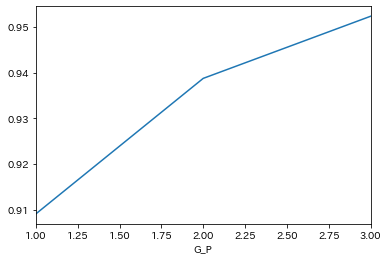

In [62]:
data3.groupby("G_P")["Q1"].mean().plot(kind="line")

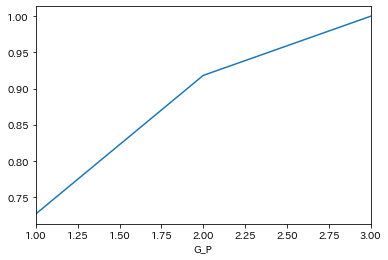

In [63]:
data3.groupby("G_P")["Q5"].mean().plot(kind="line")

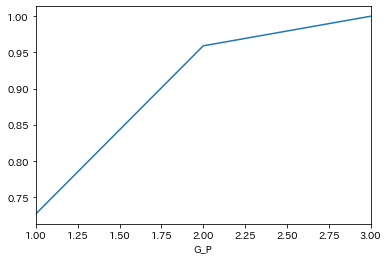

In [64]:
data3.groupby("G_P")["Q11"].mean().plot(kind="line")